In [1]:
# parameters

csv_path = "examples/data/lang_skills.csv"
output_png = "examples/outputs/lang_radar.png"
title = "Ruby vs Python: Strength Profile (1–5)"

In [2]:
# Parameters
csv_path = "examples/data/lang_skills.csv"
output_png = "examples/outputs/lang_radar.png"
title = "Ruby vs Python: Strength Profile (1\u20135) from json"


In [3]:
# setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_scores(csv_path):
    return pd.read_csv(csv_path)

def plot_radar(df, title):
    labels = df["dimension"].unique()
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # ---- polar axis setup (coordinate system) ----
    ax.set_theta_offset(np.pi / 2)    # 12 o'clock start
    ax.set_theta_direction(-1)        # clockwise
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 5)
    # ---- plot data ----
    for lang in df["language"].unique():
        values = df[df["language"] == lang]["score"].tolist()
        values += values[:1]
        ax.plot(angles, values, label=lang)
        ax.fill(angles, values, alpha=0.25)

# ---- decorations ----
    ax.set_title(title)
    ax.legend(loc="upper right")
    return fig

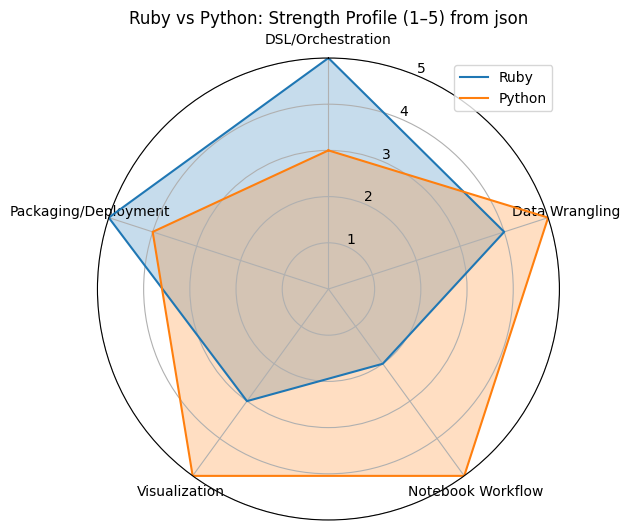

In [4]:
# graph_view

df = load_scores(csv_path)
fig = plot_radar(df, title)
plt.show()